# Cornershop Challenge

Coded by: **Jorge Polanco Roque**

In [1]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from shapely.geometry import Point, Polygon
from sklearn import linear_model
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from sklearn.metrics import *
from pandasql import sqldf
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np
import descartes
import warnings
import shapely
import folium

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Defining a SQL function
pysqldf = lambda q: sqldf(q, globals())

______________________________________________________________________________________________________

# I. Data Pre-Processing

The first step is going to be the extaction and loading of the input databases. Before going further with the challenge, I will transform the input into a final dataframe (a consolidated final table). Once having the final dataframe, then I will present the results of each requested point.

**Importing the data:**

In [4]:
# Defining paths
path = "C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/businessintelligence-test-master/data"

# Importing the input tables
order_product = pd.read_csv(path+'/order_product.csv')
orders = pd.read_csv(path+'/orders.csv')
shoppers = pd.read_csv(path+'/shoppers.csv')
storebranch = pd.read_csv(path+'/storebranch.csv')

**Exploring the data:**

***a) Order_product Table***

In [5]:
# Shape of the table
order_product.shape

(120876, 5)

In [6]:
# First 5 rows of the database
order_product.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.30,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1.00,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2.00,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1.00,1.000,UN


In [7]:
# Data type
order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120876 entries, 0 to 120875
Data columns (total 5 columns):
order_id          120876 non-null object
product_id        120876 non-null object
quantity          120876 non-null float64
quantity_found    120876 non-null float64
buy_unit          120876 non-null object
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [8]:
# Is there any null values?
order_product.isnull().sum()

order_id          0
product_id        0
quantity          0
quantity_found    0
buy_unit          0
dtype: int64

In [9]:
# Is there any NA values?
order_product.isna().sum()

order_id          0
product_id        0
quantity          0
quantity_found    0
buy_unit          0
dtype: int64

***b) Orders Table***

In [10]:
# Shape of the table
orders.shape

(7295, 11)

In [11]:
# First 5 rows of the database
orders.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861
1,0d37a1eea001f01b40232ffd496ff663,18.177712,-100.357051,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732
2,528428e9b9eb5d3bd0dbdd8da692b087,18.266832,-100.317553,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248884,-100.322622,2,10:00:00,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.229110,-100.322672,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208


In [12]:
# Data type
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 11 columns):
order_id           7295 non-null object
lat                7295 non-null float64
lng                7295 non-null float64
dow                7295 non-null int64
promised_time      7295 non-null object
actual_time        7295 non-null object
on_demand          7295 non-null bool
picker_id          7295 non-null object
driver_id          7295 non-null object
store_branch_id    7295 non-null object
total_minutes      6543 non-null float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 577.1+ KB


In [13]:
# Is there any null values?
orders.isnull().sum()

order_id             0
lat                  0
lng                  0
dow                  0
promised_time        0
actual_time          0
on_demand            0
picker_id            0
driver_id            0
store_branch_id      0
total_minutes      752
dtype: int64

In [14]:
# Is there any NA values?
orders.isna().sum()

order_id             0
lat                  0
lng                  0
dow                  0
promised_time        0
actual_time          0
on_demand            0
picker_id            0
driver_id            0
store_branch_id      0
total_minutes      752
dtype: int64

In [15]:
# Creating a 'day_of_week' feature based on 'dow'
week_day = {0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'}
orders['day_of_week'] = orders['dow'].map(week_day)

orders['day_of_week'] = pd.Categorical(orders['day_of_week'])

In [16]:
# Changing the data type of the 'promised_time' feature
orders['promised_time'] = orders['promised_time'].astype('datetime64[ns]').dt.hour

In [17]:
# Changing the data type of the 'actual_time' feature
orders['actual_time'] = orders['actual_time'].astype('datetime64[ns]').dt.hour

In [18]:
# Changing the data type of the 'on_demand' feature
orders['on_demand'] = orders['on_demand'].astype('uint8') 
orders['on_demand'] = pd.Categorical(orders['on_demand'])

In [19]:
# Categories of 'promised_time_cat'
orders['promised_time_cat'] = 1
orders['promised_time_cat'][(orders['promised_time'] <= 6)] = 'Early Morning'
orders['promised_time_cat'][(orders['promised_time'] > 6) & (orders['promised_time'] <= 12)] = 'Morning'
orders['promised_time_cat'][(orders['promised_time'] > 12) & (orders['promised_time'] <= 18)] = 'Afternoon'
orders['promised_time_cat'][(orders['promised_time'] > 18)] = 'Night'

orders['promised_time_cat'] = pd.Categorical(orders['promised_time_cat'])

In [20]:
# Categories of 'actual_time_cat'
orders['actual_time_cat'] = 1
orders['actual_time_cat'][(orders['actual_time'] <= 6)] = 'Early Morning'
orders['actual_time_cat'][(orders['actual_time'] > 6) & (orders['actual_time'] <= 12)] = 'Morning'
orders['actual_time_cat'][(orders['actual_time'] > 12) & (orders['actual_time'] <= 18)] = 'Afternoon'
orders['actual_time_cat'][(orders['actual_time'] > 18)] = 'Night'

orders['actual_time_cat'] = pd.Categorical(orders['actual_time_cat'])

______________________________________________________________________________________________________

#### OPTION #1: Regression Model

***Building a model to fill the missing values***

In [21]:
# orders with all the data
orders_reg = orders[orders['total_minutes'].notnull()]

orders_pred = orders[orders['total_minutes'].isnull()]

In [22]:
# Integer encode - 'day_of_week'
label_encoder_1 = LabelEncoder()
integer_encoded_1 = label_encoder_1.fit_transform(orders_reg['day_of_week'])
onehot_encoder_1 = OneHotEncoder(sparse=False)
integer_encoded_1 = integer_encoded_1.reshape(len(integer_encoded_1), 1)
onehot_encoded_1 = onehot_encoder_1.fit_transform(integer_encoded_1)

dow_ohe = pd.DataFrame(onehot_encoded_1)

# Integer encode - 'promised_time_cat'
label_encoder_2 = LabelEncoder()
integer_encoded_2 = label_encoder_2.fit_transform(orders_reg['promised_time_cat'])
onehot_encoder_2 = OneHotEncoder(sparse=False)
integer_encoded_2 = integer_encoded_2.reshape(len(integer_encoded_2), 1)
onehot_encoded_2 = onehot_encoder_2.fit_transform(integer_encoded_2)

promised_time_cat_ohe = pd.DataFrame(onehot_encoded_2)

# Integer encode - 'actual_time_cat'
label_encoder_3 = LabelEncoder()
integer_encoded_3 = label_encoder_3.fit_transform(orders_reg['actual_time_cat'])
onehot_encoder_3 = OneHotEncoder(sparse=False)
integer_encoded_3 = integer_encoded_3.reshape(len(integer_encoded_3), 1)
onehot_encoded_3 = onehot_encoder_3.fit_transform(integer_encoded_3)

actual_time_cat_ohe = pd.DataFrame(onehot_encoded_3)

In [23]:
# Creating a database to run a regresion
orders_reg2 = pd.DataFrame(np.hstack([orders_reg[['on_demand', 'total_minutes']], dow_ohe, promised_time_cat_ohe]))
orders_reg2.columns = ['on_demand', 'total_minutes', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                      'Early Morning - Promised', 'Morning - Promised', 'Afternoon - Promised', 'Night - Promised']

orders_reg2 = orders_reg2[['on_demand', 'total_minutes', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Morning - Promised', 'Afternoon - Promised', 'Night - Promised']]

X = orders_reg2[['on_demand', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
            'Morning - Promised', 'Afternoon - Promised', 'Night - Promised']]

y = orders_reg2[['total_minutes']]

In [24]:
# Running a linear regression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.0875783624862958

Considering such a low R2, probably we should choose another approach.

______________________________________________________________________________________________________

#### OPTION #2: Group by Median

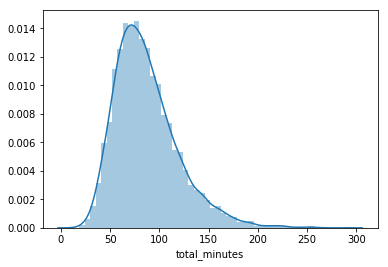

In [25]:
# Total_minutes distribution excluding the missing values
sns.distplot(orders['total_minutes'][orders['total_minutes'].notnull()])

In [26]:
# CTL metrics
orders['total_minutes'][orders['total_minutes'].notnull()].describe()

count    6543.000000
mean       86.990510
std        32.511126
min        13.255014
25%        64.076635
50%        81.634440
75%       103.896845
max       289.865714
Name: total_minutes, dtype: float64

A popular way to replace the missing values is the using of medians. However, recognizing the difference of 'total_minutes' among the week days, I will choose the median of each day in order to try to have a more educated guess.

In [27]:
# Calculating the median by week day
pivot1 = orders[orders['total_minutes'].notnull()].groupby('day_of_week').agg({'total_minutes':np.median})
pivot1

,total_minutes
day_of_week,
Friday,79.546304
Monday,86.372588
Saturday,75.332870
Sunday,76.385168
Thursday,80.265052
Tuesday,85.273684
Wednesday,82.173236


In [28]:
# Labeling missing values as '-1'
orders['total_minutes'] = orders['total_minutes'].fillna(-1)

In [29]:
# Replacing the week day median
orders['total_minutes'][(orders['day_of_week'] == 'Sunday') & (orders['total_minutes'] == -1)] = pivot1.loc['Sunday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Monday') & (orders['total_minutes'] == -1)] = pivot1.loc['Monday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Tuesday') & (orders['total_minutes'] == -1)] = pivot1.loc['Tuesday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Wednesday') & (orders['total_minutes'] == -1)] = pivot1.loc['Wednesday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Thursday') & (orders['total_minutes'] == -1)] = pivot1.loc['Thursday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Friday') & (orders['total_minutes'] == -1)] = pivot1.loc['Friday'][0]
orders['total_minutes'][(orders['day_of_week'] == 'Saturday') & (orders['total_minutes'] == -1)] = pivot1.loc['Saturday'][0]

***c) Shoppers Table***

In [30]:
# Shape of the table
shoppers.shape

(600, 6)

In [31]:
# First 5 rows of the database
shoppers.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [32]:
# Data type
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
shopper_id       600 non-null object
seniority        600 non-null object
found_rate       564 non-null float64
picking_speed    600 non-null float64
accepted_rate    594 non-null float64
rating           566 non-null float64
dtypes: float64(4), object(2)
memory usage: 28.2+ KB


In [33]:
# Is there any null values?
shoppers.isnull().sum()

shopper_id        0
seniority         0
found_rate       36
picking_speed     0
accepted_rate     6
rating           34
dtype: int64

In [34]:
# Is there any NA values?
shoppers.isna().sum()

shopper_id        0
seniority         0
found_rate       36
picking_speed     0
accepted_rate     6
rating           34
dtype: int64

In [35]:
# Seniority as categorical variable
shoppers['seniority'] = pd.Categorical(shoppers['seniority'])

Considering we are presenting 36 and 34missing values in the 'found_rate' and 'raiting' variables, we have to evaluate the impact that could have and the best approach to deal with.

In [36]:
# Calculating the median by seniority
pivot2 = shoppers[shoppers['found_rate'].notnull()].groupby('seniority').agg({'found_rate':np.median})
pivot2

,found_rate
seniority,
ADVANCED,0.86315
BEGINNER,0.81990
INTERMEDIATE,0.84670
REVIEW,0.83280


In [37]:
# Calculating the median by seniority
pivot3 = shoppers[shoppers['accepted_rate'].notnull()].groupby('seniority').agg({'accepted_rate':np.median})
pivot3

,accepted_rate
seniority,
ADVANCED,1.0000
BEGINNER,0.9333
INTERMEDIATE,0.9600
REVIEW,0.9200


In [38]:
# Calculating the median by seniority
pivot4 = shoppers[shoppers['rating'].notnull()].groupby('seniority').agg({'rating':np.median})
pivot4

,rating
seniority,
ADVANCED,4.80
BEGINNER,5.00
INTERMEDIATE,4.84
REVIEW,4.84


In [39]:
# Labeling missing values as '-1'
shoppers['found_rate'] = shoppers['found_rate'].fillna(-1)
shoppers['accepted_rate'] = shoppers['accepted_rate'].fillna(-1)
shoppers['rating'] = shoppers['rating'].fillna(-1)

In [40]:
# Replacing the seniority median
shoppers['found_rate'][(shoppers['seniority'] == 'ADVANCED') & (shoppers['found_rate'] == -1)] = pivot2.loc['ADVANCED'][0]
shoppers['found_rate'][(shoppers['seniority'] == 'BEGINNER') & (shoppers['found_rate'] == -1)] = pivot2.loc['BEGINNER'][0]
shoppers['found_rate'][(shoppers['seniority'] == 'INTERMEDIATE') & (shoppers['found_rate'] == -1)] = pivot2.loc['INTERMEDIATE'][0]
shoppers['found_rate'][(shoppers['seniority'] == 'REVIEW') & (shoppers['found_rate'] == -1)] = pivot2.loc['REVIEW'][0]

In [41]:
# Replacing the seniority median
shoppers['accepted_rate'][(shoppers['seniority'] == 'ADVANCED') & (shoppers['accepted_rate'] == -1)] = pivot3.loc['ADVANCED'][0]
shoppers['accepted_rate'][(shoppers['seniority'] == 'BEGINNER') & (shoppers['accepted_rate'] == -1)] = pivot3.loc['BEGINNER'][0]
shoppers['accepted_rate'][(shoppers['seniority'] == 'INTERMEDIATE') & (shoppers['accepted_rate'] == -1)] = pivot3.loc['INTERMEDIATE'][0]
shoppers['accepted_rate'][(shoppers['seniority'] == 'REVIEW') & (shoppers['accepted_rate'] == -1)] = pivot3.loc['REVIEW'][0]

In [42]:
# Replacing the seniority median
shoppers['rating'][(shoppers['seniority'] == 'ADVANCED') & (shoppers['rating'] == -1)] = pivot4.loc['ADVANCED'][0]
shoppers['rating'][(shoppers['seniority'] == 'BEGINNER') & (shoppers['rating'] == -1)] = pivot4.loc['BEGINNER'][0]
shoppers['rating'][(shoppers['seniority'] == 'INTERMEDIATE') & (shoppers['rating'] == -1)] = pivot4.loc['INTERMEDIATE'][0]
shoppers['rating'][(shoppers['seniority'] == 'REVIEW') & (shoppers['rating'] == -1)] = pivot4.loc['REVIEW'][0]

***d) Storebranch Table***

In [43]:
# Shape of the table
storebranch.shape

(113, 4)

In [44]:
# First 5 rows of the database
storebranch.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160308,-100.260673
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,18.272830,-100.318814
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273494,-100.319585
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,18.247743,-100.403558
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203111,-100.297714


In [45]:
# Data type
storebranch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
store_branch_id    113 non-null object
store              113 non-null object
lat                113 non-null float64
lng                113 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.6+ KB


In [46]:
# Is there any null values?
storebranch.isnull().sum()

store_branch_id    0
store              0
lat                0
lng                0
dtype: int64

In [47]:
# Is there any NA values?
storebranch.isna().sum()

store_branch_id    0
store              0
lat                0
lng                0
dtype: int64

# II. SQL Queries

**1. Calculate the number of orders per day of the week, distinguishing if the orders are on_demand.**

In [48]:
num_orders = pysqldf("""

SELECT day_of_week, COUNT(order_id) AS 'Number of orders by day'
FROM  orders
WHERE on_demand = '1'
GROUP BY day_of_week, on_demand
ORDER BY dow

""")

In [49]:
num_orders

,day_of_week,Number of orders by day
0,Sunday,381
1,Monday,426
2,Tuesday,610
3,Wednesday,480
4,Thursday,572
5,Friday,291
6,Saturday,310


In [50]:
# Saving a Pandas Dataframe as a CSV
num_orders.to_csv('C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/Queries/Q1.csv',index=False) 

**2. Calculate the average quantity of distinct products that each order has, grouped by store.**

In [51]:
avg_distinct_products = pysqldf("""

SELECT DISTINCT A.store_branch_id, COUNT(DISTINCT B.product_id)/COUNT(DISTINCT A.order_id) AS 'Avg Distinct Products'
FROM orders AS A
LEFT JOIN order_product AS B ON A.order_id = B.order_id
GROUP BY A.store_branch_id
ORDER BY 'Avg Distinct Products' DESC

""")

In [52]:
avg_distinct_products.head()

,store_branch_id,Avg Distinct Products
0,00868095685ee799fb5c158e8d081fe1,1
1,02020427c72aa211602ead141160a9eb,0
2,0302e4778cdaf296d9b69564e6296b6b,13
3,0309659a74b54b7933aa6c0571497d9b,11
4,0a5262149db2b5b849da2128cee09358,2


In [53]:
# Saving a Pandas Dataframe as a CSV
avg_distinct_products.to_csv('C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/Queries/Q2.csv',index=False) 

**3. Calculate the average found rate(*) of the orders grouped by the product format and day of the week.**

In [54]:
avg_found_rate = pysqldf("""

SELECT B.day_of_week, A.buy_unit, AVG(A.quantity_found/A.quantity) AS 'Found rate'
FROM order_product AS A
LEFT JOIN orders AS B ON A.order_id = B.order_id
GROUP BY B.day_of_week, A.buy_unit
ORDER BY B.dow, A.buy_unit


""")

In [55]:
avg_found_rate

,day_of_week,buy_unit,Found rate
0,Sunday,KG,1.648505
1,Sunday,UN,0.837293
2,Monday,KG,1.708183
3,Monday,UN,0.847000
4,Tuesday,KG,1.686631
5,Tuesday,UN,0.849243
6,Wednesday,KG,1.656883
7,Wednesday,UN,0.848326
8,Thursday,KG,1.611180
9,Thursday,UN,0.849060


In [56]:
# Saving a Pandas Dataframe as a CSV
avg_found_rate.to_csv('C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/Queries/Q3.csv',index=False) 

**4. Calculate the average error and mean squared error of our estimation model for each hour of the day.**

I am not sure what do you mean with 'our estimation model'. So, I will assume that you are expecting the following:
* total_minutes = dummies of promised hour + error

In [57]:
# Integer encode - 'day_of_week'
label_encoder_4 = LabelEncoder()
integer_encoded_4 = label_encoder_4.fit_transform(orders['promised_time'])
onehot_encoder_4 = OneHotEncoder(sparse=False)
integer_encoded_4 = integer_encoded_4.reshape(len(integer_encoded_4), 1)
onehot_encoded_4 = onehot_encoder_4.fit_transform(integer_encoded_4)

promised_time_ohe = pd.DataFrame(onehot_encoded_4)

In [58]:
orders_reg3 = pd.DataFrame(np.hstack([orders[['total_minutes']], promised_time_ohe]))
orders_reg3.columns = ['total_minutes','12 am', '8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm',
                            '6 pm','7 pm','8 pm','9 pm','10 pm','11 pm']
orders_reg3.head()

,total_minutes,12 am,8 am,9 am,10 am,11 am,12 pm,1 pm,2 pm,3 pm,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm
0,91.800861,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,206.599732,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.458001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,124.778761,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,130.321208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Running a linear regression 
X = orders_reg3[['12 am', '8 am','9 am','10 am','11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm',
                            '6 pm','7 pm','8 pm','9 pm','10 pm']]
y = orders_reg3[['total_minutes']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [60]:
# Calculating the Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print("Mean Squared Error: {}".format(MSE))
print("Root Mean Squared Error: {}".format(RMSE))

Mean Squared Error: 917.2176201592322
Root Mean Squared Error: 30.285600871688715


In [61]:
OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          total_minutes   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                              2830.
Date:                Sun, 12 Jul 2020   Prob (F-statistic):                        0.00
Time:                        21:02:04   Log-Likelihood:                         -36108.
No. Observations:                7295   AIC:                                  7.225e+04
Df Residuals:                    7279   BIC:                                  7.236e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
12 am         85.7088      6.242     13.731      0.000      73.473      97.945
8 am          75.2750     17.094      4.403      0.000      41.765     108.785
9 am          79.4715      3.231     24.600      0.000      73.139      85.804
10 am         90.7855      1.545     58.780      0.000      87.758      93.813
11 am         86.1017      1.323     65.090      0.000      83.509      88.695
12 pm         84.5577      1.388     60.934      0.000      81.837      87.278
1 pm          87.4579      1.312     66.657      0.000      84.886      90.030
2 pm          86.8181      1.357     63.990      0.000      84.158      89.478
3 pm          86.8129      1.545     56.208      0.000      83.785      89.841
4 pm          86.3451      1.565     55.158      0.000      83.276      89.414
5 pm          84.1736      1.649     51.053      0.000      80.942      87.406
6 pm          82.6241      1.589     52.001      0.000      79.509      85.739
7 pm          86.3510      1.552     55.623      0.000      83.308      89.394
8 pm          86.6976      1.496     57.937      0.000      83.764      89.631
9 pm          88.7002      1.562     56.781      0.000      85.638      91.762
10 pm         87.2651      1.509     57.811      0.000      84.306      90.224
==============================================================================
Omnibus:                     1863.853   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4979.643
Skew:                           1.367   Prob(JB):                         0.00
Kurtosis:                       5.985   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5. Calculate the number of orders in which the picker_id and driver_id are different.**

In [62]:
dif_driver_picker = pysqldf("""

SELECT COUNT(order_id) AS 'Num of Orders'
FROM orders
WHERE picker_id != driver_id


""")

In [63]:
dif_driver_picker

,Num of Orders
0,216


In [64]:
# Saving a Pandas Dataframe as a CSV
dif_driver_picker.to_csv('C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/Queries/Q5.csv',index=False) 

# III. Additional Analysis

**a) Map of orders**

You will find the resulting map within the email.

In [65]:
# Defining the geometry
geometry = [Point(xy) for xy in zip(orders["lng"],orders["lat"])]
geometry[:3]

In [66]:
# Type of format for the lat and lng
crs = {'init':'epsg:4326'}

In [67]:
# Transforming the DataFrame to a GeoDataFrame
geo_df = gpd.GeoDataFrame(orders, crs=crs, geometry=geometry)
geo_df.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,day_of_week,promised_time_cat,actual_time_cat,geometry
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,13,12,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,Tuesday,Afternoon,Morning,POINT (-100.31391 18.22114)
1,0d37a1eea001f01b40232ffd496ff663,18.177712,-100.357051,2,13,10,0,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,Tuesday,Afternoon,Morning,POINT (-100.35705 18.17771)
2,528428e9b9eb5d3bd0dbdd8da692b087,18.266832,-100.317553,2,11,10,0,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,Tuesday,Morning,Morning,POINT (-100.31755 18.26683)
3,d3f7be6d64eae7405b7bf024e04807a2,18.248884,-100.322622,2,10,9,0,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,Tuesday,Morning,Morning,POINT (-100.32262 18.24888)
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.229110,-100.322672,2,11,10,0,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,Tuesday,Morning,Morning,POINT (-100.32267 18.22911)


In [68]:
# Starting point
m = folium.Map(location=[18.221141,-100.313914], zoom_start=13)

# Plotting all the different locations
for i in range(len(geo_df)):
    folium.Marker(location=(geo_df.iloc[i,1], geo_df.iloc[i,2])).add_to(m)

m.save('C:/Users/jpolancoroque/Desktop/Job Applications/Cornershop/mapa.html')

**b) Plotting**

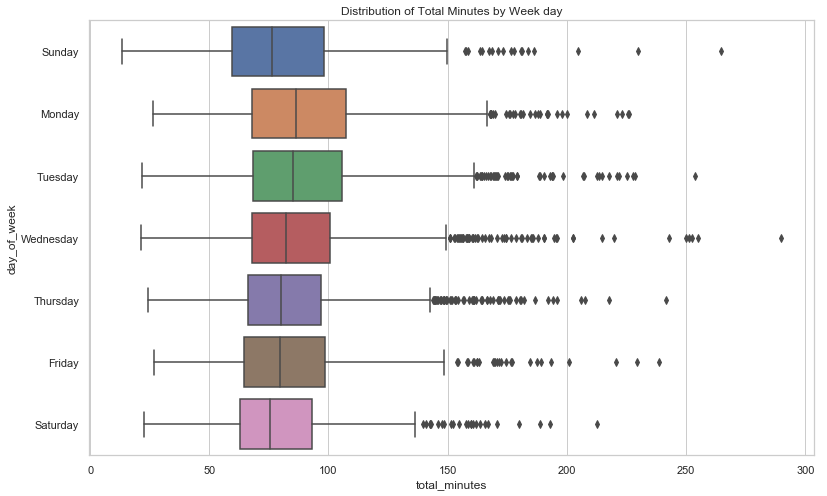

In [89]:
# Boxplot - total_minutes
fig, ax = plt.subplots(figsize=(13,8))
sns.set(style="whitegrid")
ax = sns.boxplot(x="total_minutes", y="day_of_week", data=orders, order=["Sunday", "Monday", "Tuesday", "Wednesday",
                                                                        "Thursday", "Friday", "Saturday"])
plt.title('Distribution of Total Minutes by Week day')
plt.show()

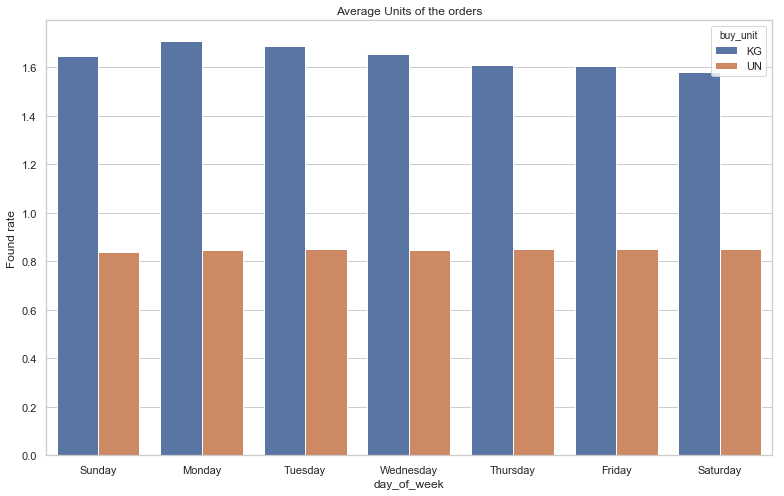

In [101]:
# Barplot - day_of_week - buy_unit
fig, ax = plt.subplots(figsize=(13,8))
sns.set(style="whitegrid")
ax = sns.barplot(x="day_of_week", y="Found rate", hue = "buy_unit", data=avg_found_rate)
plt.title('Average Units of the orders')
plt.show()

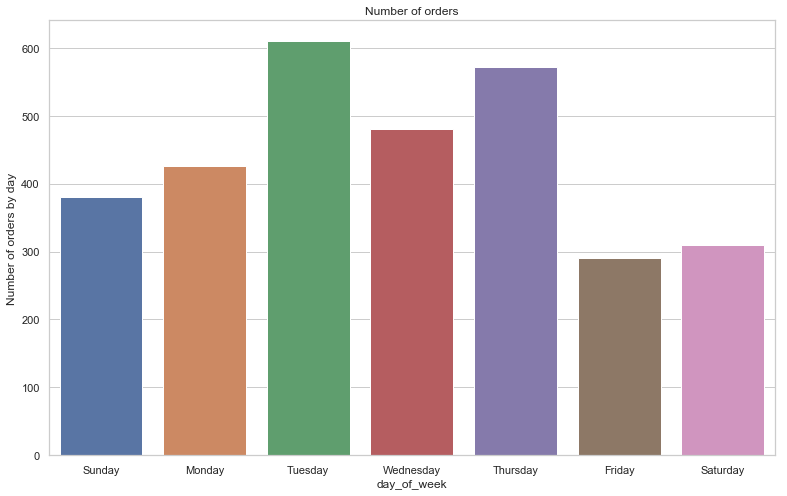

In [104]:
# Barplot - total_minutes
fig, ax = plt.subplots(figsize=(13,8))
sns.set(style="whitegrid")
ax = sns.barplot(x="day_of_week", y="Number of orders by day", data=num_orders)
plt.title('Number of orders')
plt.show()

In [102]:
num_orders

,day_of_week,Number of orders by day
0,Sunday,381
1,Monday,426
2,Tuesday,610
3,Wednesday,480
4,Thursday,572
5,Friday,291
6,Saturday,310
